## Task 1

### Build a CNN with three convolution layers with feature maps 25, 50, and 100 respectively with kernal size equal 2\*2. Each convolution layer will be followed by an relu function and a max pool layer with pool size 2\*2. 
### (A)
1. Use Cifar10 Dataset `keras.datasets.cifar10`
2. Train the CNN for 10 epoch on `CIFAR10` dataset only on classes from 0 to 4
3. plot training & validation loss.


### (B)
1. Increase the number of epochs to 30 and plot the new training and validation loss curves
2. Test the model (with 30 epochs) on the test set and write the average tetsing accuracy
3. Now, augument the test images for class 1 (using flip left to right augumetation) and then test the CNN on the test dataset for class 1 and write the average testing accuracy
4. Apply the same augumentation on the training dataset for class 1, and add these augumented images to the training dataset, retrain the model for 30 epocs, then test it again on the augumented test images for class 1 you created on the previous step
5. Discuss the change in the accuracy between 3 & 4

TensorFlow 2.x selected.
2.1.0
2.2.4-tf
170500096/170498071 [==============================] - 11s 0us/step
Full training data set (50000, 32, 32, 3)
full training labels set (50000, 1)
Full testing data set (10000, 32, 32, 3)
full testing labels set (10000, 1)
training labels for classes from zero to four (25000, 1)
training data for classes from zero to four (25000, 32, 32, 3)
testing labels  for classes from zero to four (5000, 1)
testing data for classes from zero to four (5000, 32, 32, 3)
Show sizes of training and validation sets after splitting them
training labels for classes from zero to four (18750, 1)
training data for classes from zero to four (18750, 32, 32, 3)
validation labels  for classes from zero to four (6250, 1)
validation data for classes from zero to four (6250, 32, 32, 3)


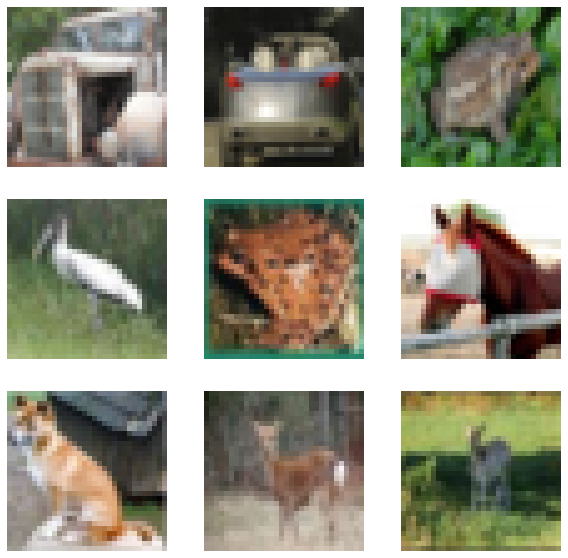

In [1]:
# A.1
%tensorflow_version 2.x
import pickle
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)
print(keras.__version__)

(X_train_full_all, y_train_full_all), (X_test_all, y_test_all) = tf.keras.datasets.cifar10.load_data()
print("Full training data set", X_train_full_all.shape)
print("full training labels set", y_train_full_all.shape)

print("Full testing data set", X_test_all.shape)
print("full testing labels set", y_test_all.shape)

# Visualizting some training data

fig, axes1 = plt.subplots(3,3,figsize=(10,10))
for j in range(3):
    for k in range(3):
        i = np.random.choice(range(len(X_train_full_all)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train_full_all[i:i+1][0])


X_train_full_0_4 = []
y_train_full_0_4 = []
X_test_0_4 = []
y_test_0_4 = []

##Filtering data to get only Classes from zero to Four
for i in range(len(y_train_full_all)):
    if (y_train_full_all[i] == 0) or (y_train_full_all[i] == 1) or (y_train_full_all[i] == 2) or (y_train_full_all[i] == 3) or (y_train_full_all[i] == 4):
        y_train_full_0_4.append(y_train_full_all[i])
        X_train_full_0_4.append(X_train_full_all[i])
    else:
        continue
        
y_train_full_0_4 = np.array(y_train_full_0_4)
X_train_full_0_4 = np.array(X_train_full_0_4)  

print("training labels for classes from zero to four", y_train_full_0_4.shape)
print("training data for classes from zero to four", X_train_full_0_4.shape)

for i in range(len(y_test_all)):
    if (y_test_all[i] == 0) or (y_test_all[i] == 1) or (y_test_all[i] == 2) or (y_test_all[i] == 3) or (y_test_all[i] == 4):
        y_test_0_4.append(y_test_all[i])
        X_test_0_4.append(X_test_all[i])
    else:
        continue
y_test_0_4 = np.array(y_test_0_4)
X_test_0_4 = np.array(X_test_0_4)
X_test_0_4 = X_test_0_4.astype('float32') / 255.

print("testing labels  for classes from zero to four", y_test_0_4.shape)
print("testing data for classes from zero to four", X_test_0_4.shape)

#Spitting training data into validation and testing 

X_train_0_4, X_valid_0_4, y_train_0_4, y_valid_0_4 = train_test_split(X_train_full_0_4, y_train_full_0_4)

X_train_0_4 =  X_train_0_4.astype('float32') / 255.
X_valid_0_4 = X_valid_0_4.astype('float32') / 255.


print("Show sizes of training and validation sets after splitting them")
print("training labels for classes from zero to four", y_train_0_4.shape)
print("training data for classes from zero to four", X_train_0_4.shape)

print("validation labels  for classes from zero to four", y_valid_0_4.shape)
print("validation data for classes from zero to four", X_valid_0_4.shape)


In [2]:
# A.2

model_Q1_A = keras.models.Sequential([
keras.layers.Conv2D(25, 2, activation="relu", padding="same",
input_shape=[32, 32, 3]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(50, 2, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(100, 2, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(5, activation="softmax")
])

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_Q1_A.summary()

model_Q1_A.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history_Q1_A = model_Q1_A.fit(X_train_0_4, y_train_0_4, epochs=10, validation_data=[X_valid_0_4, y_valid_0_4])
score = model_Q1_A.evaluate(X_test_0_4, y_test_0_4)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 25)        325       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 50)        5050      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 100)         20100     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


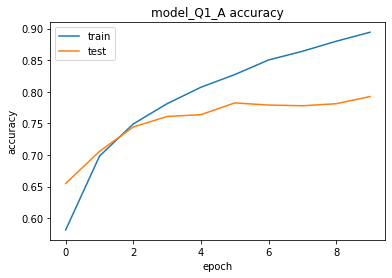

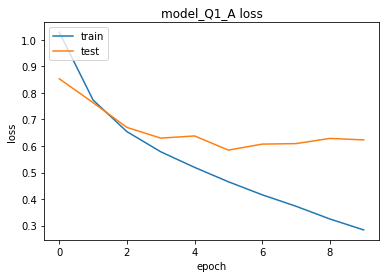

In [3]:
# A.3
print(history_Q1_A.history.keys())
# summarize history for accuracy
plt.plot(history_Q1_A.history['accuracy'])
plt.plot(history_Q1_A.history['val_accuracy'])
plt.title('model_Q1_A accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Q1_A.history['loss'])
plt.plot(history_Q1_A.history['val_loss'])
plt.title('model_Q1_A loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 25)        325       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 50)        5050      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 100)         20100     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

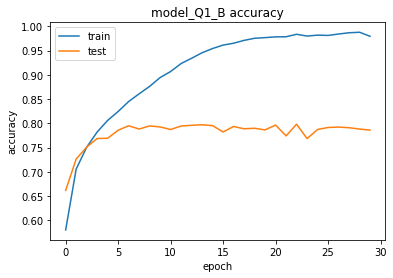

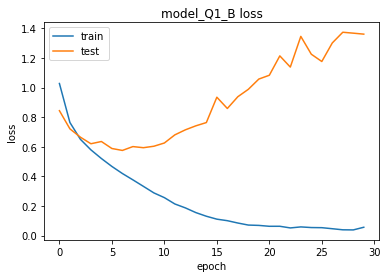

In [4]:
# B.1

checkpoint_cb_Q1_B = keras.callbacks.ModelCheckpoint("model_Q1_B.h5",save_best_only=True)

model_Q1_B = keras.models.Sequential([
keras.layers.Conv2D(25, 2, activation="relu", padding="same",
input_shape=[32, 32, 3]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(50, 2, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(100, 2, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(5, activation="softmax")
])

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_Q1_B.summary()

model_Q1_B.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
#history_Q1_B = model_Q1_A.fit(X_train_0_4, y_train_0_4, epochs=30, validation_data=[X_valid_0_4, y_valid_0_4])
history_Q1_B = model_Q1_B.fit(X_train_0_4, y_train_0_4, epochs=30 ,validation_data=(X_valid_0_4, y_valid_0_4), callbacks=[checkpoint_cb_Q1_B])

print(history_Q1_B.history.keys())
# summarize history for accuracy
plt.plot(history_Q1_B.history['accuracy'])
plt.plot(history_Q1_B.history['val_accuracy'])
plt.title('model_Q1_B accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Q1_B.history['loss'])
plt.plot(history_Q1_B.history['val_loss'])
plt.title('model_Q1_B loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [5]:
# B.2
score_model_Q1_B = model_Q1_B.evaluate(X_test_0_4, y_test_0_4)
print("loss value & metrics values for the model in test mode\n",score_model_Q1_B)


5000/5000 [==============================] - 0s 63us/sample - loss: 1.3335 - accuracy: 0.7896
loss value & metrics values for the model in test mode
 [1.3334861542701721, 0.7896]


1000/1000 [==============================] - 0s 75us/sample - loss: 0.5918 - accuracy: 0.9250
loss value & metrics values for the model in test mode
 [0.5917577483926434, 0.925]


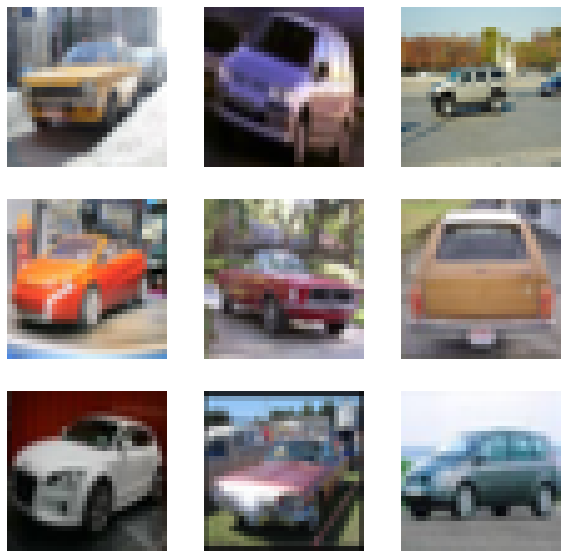

In [6]:
# B.3
i = j = k = 0
X_test_1 = []
y_test_1 = []
for i in range(len(y_test_all)):
    if  (y_test_all[i] == 1):
        y_test_1.append(y_test_all[i])
        X_test_1.append(X_test_all[i])
    else:
        continue
y_test_1 = np.array(y_test_1)
X_test_1 = np.array(X_test_1)
X_test_1 = X_test_1.astype('float32') / 255.

X_test_1_aug = tf.image.random_flip_left_right(X_test_1)

model_Q1_B_30_aug = model_Q1_B.evaluate(X_test_1_aug, y_test_1)
print("loss value & metrics values for the model in test mode\n",model_Q1_B_30_aug)

i = j = k = 0           
fig_test_aug, axes1_test_aug = plt.subplots(3,3,figsize=(10,10))
for j in range(3):
    for k in range(3):
        i = np.random.choice(range(len(X_test_1_aug)))
        axes1_test_aug[j][k].set_axis_off()
        axes1_test_aug[j][k].imshow(X_test_1_aug[i:i+1][0])


Show sizes of training and validation sets for split class1
training labels for classes from zero to four (3776, 1)
training data for classes from zero to four (3776, 32, 32, 3)
validation labels  for classes from zero to four (1224, 1)
validation data for classes from zero to four (1224, 32, 32, 3)
<class 'numpy.ndarray'>
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 25)        325       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 50)        11300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_____________________________________________________________

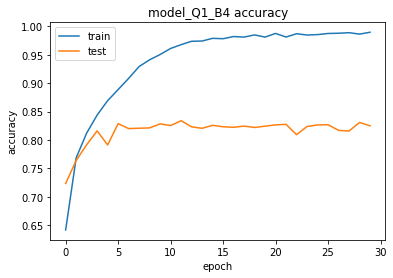

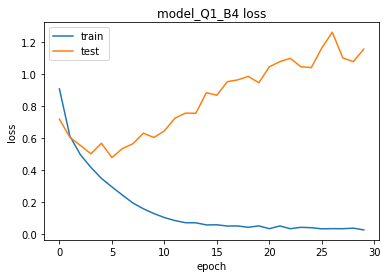

1000/1000 [==============================] - 0s 98us/sample - loss: 0.5918 - accuracy: 0.9250
loss value & metrics values for the model in test mode
 [0.5917577483926434, 0.925]


In [7]:
# B.4

i = j = k = 0
X_train_1 = []
y_train_1 = []
X_valid_1 = []
y_valid_1 = []

#X_train_with_aug = []
#y_train_with_aug = []
#X_valid_with_aug = []
#y_valid_with_aug = []
#
for i in range(len(y_train_0_4)):
    if  (y_train_0_4[i] == 1):
        y_train_1.append(y_train_0_4[i])
        X_train_1.append(X_train_0_4[i])
    else:
        continue
        
i = j = k = 0
for i in range(len(y_valid_0_4)):
    if  (y_valid_0_4[i] == 1):
        y_valid_1.append(y_valid_0_4[i])
        X_valid_1.append(X_valid_0_4[i])
    else:
        continue

X_train_1 = np.array(X_train_1)
y_train_1 = np.array(y_train_1)
X_valid_1 = np.array(X_valid_1)
y_valid_1 = np.array(y_valid_1)

print("Show sizes of training and validation sets for split class1")
print("training labels for classes from zero to four", y_train_1.shape)
print("training data for classes from zero to four", X_train_1.shape)

print("validation labels  for classes from zero to four", y_valid_1.shape)
print("validation data for classes from zero to four", X_valid_1.shape)

#Augment traiining and validation sets
X_train_1_with_aug = tf.image.random_flip_left_right(X_train_1)
X_valid_1_with_aug = tf.image.random_flip_left_right(X_valid_1)

#(tf.Session().run(tf.constant([1,2,3]))

#Adding augmented class 1 to original training and validation data sets
X_train_1_with_aug = np.array(X_train_1_with_aug)
print(type(X_train_1_with_aug))
X_train_with_aug = np.concatenate((X_train_0_4 ,X_train_1_with_aug) , axis=0)
X_valid_with_aug = np.concatenate((X_valid_0_4, X_valid_1_with_aug), axis=0)
y_train_with_aug = np.concatenate((y_train_0_4, y_train_1), axis=0)
y_valid_with_aug = np.concatenate((y_valid_0_4, y_valid_1), axis=0)



model_Q1_B4 = keras.models.Sequential([
keras.layers.Conv2D(25, 2, activation="relu", padding="same",
input_shape=[32, 32, 3]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(50, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(5, activation="softmax")
])

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_Q1_B4.summary()

model_Q1_B4.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
#history_Q1_B4 = model_Q1_A.fit(X_train_with_aug, y_train_with_aug, epochs=30, validation_data=[X_valid_with_aug, y_valid_with_aug])
history_Q1_B4 = model_Q1_B4.fit(X_train_with_aug, y_train_with_aug, epochs=30 ,validation_data=(X_valid_with_aug, y_valid_with_aug))

print(history_Q1_B4.history.keys())
# summarize history for accuracy
plt.plot(history_Q1_B4.history['accuracy'])
plt.plot(history_Q1_B4.history['val_accuracy'])
plt.title('model_Q1_B4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Q1_B4.history['loss'])
plt.plot(history_Q1_B4.history['val_loss'])
plt.title('model_Q1_B4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


score_model_Q1_B4 = model_Q1_B.evaluate(X_test_1_aug, y_test_1)
print("loss value & metrics values for the model in test mode\n",score_model_Q1_B4)


## Task 2

### (A) 
1. Re-Use the last model from question 1 at point B.1 to classify CIFAR images with classes 5 to 9. Freeze all layers except the last one and replace it by new Softmax and run the new model for 30 epochs.
2. Plot the training and validation loss curves.
3. Unfreeze the last convolution layer (and its pooling layer) then train again on classes 5 to 9 for 30 epochs.
4. Plot the new training and validation loss curves.

### (B) 
1. Add a forth convolution layer with 200 features maps to the model that you created in step A.1 and retrian the model for 30 epochs
2. Plot the training and validation loss curves.

### (C) 
1. Write your comments on the performance by comparing steps A.4 & B.2

Full training data set (50000, 32, 32, 3)
full training labels set (50000, 1)
Full testing data set (10000, 32, 32, 3)
full testing labels set (10000, 1)
training labels for classes from five to nine (25000, 1)
training data for classes from five to nine (25000, 32, 32, 3)
testing labels  for classes from five to nine (5000, 1)
testing data for classes from five to nine (5000, 32, 32, 3)
Show sizes of training and validation sets after splitting them
training labels for classes from five to nine (18750, 1)
training data for classes from five to nine (18750, 32, 32, 3)
validation labels  for classes from five to nine (6250, 1)
validation data for classes from five to nine (6250, 32, 32, 3)
Train on 18750 samples, validate on 6250 samples
Epoch 1/30
18750/18750 [==============================] - 3s 141us/sample - loss: 1.0454 - accuracy: 0.5833 - val_loss: 0.8599 - val_accuracy: 0.6654
Epoch 2/30
18750/18750 [==============================] - 2s 119us/sample - loss: 0.8300 - accuracy: 0.

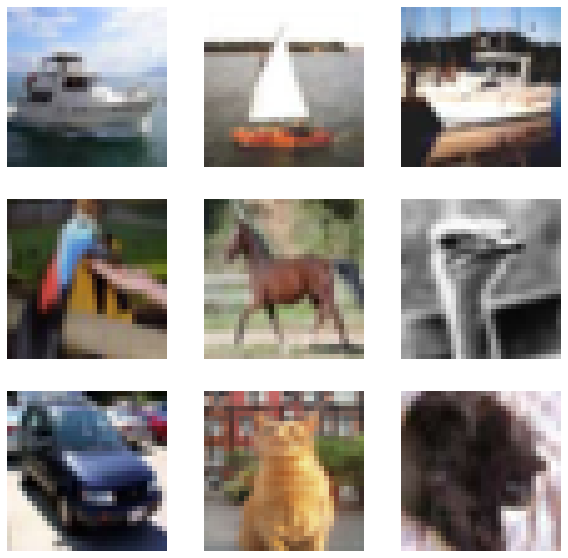

In [9]:
# A.1

(X_train_full_all, y_train_full_all), (X_test_all, y_test_all) = tf.keras.datasets.cifar10.load_data()
print("Full training data set", X_train_full_all.shape)
print("full training labels set", y_train_full_all.shape)

print("Full testing data set", X_test_all.shape)
print("full testing labels set", y_test_all.shape)

# Visualizting some training data

fig, axes1 = plt.subplots(3,3,figsize=(10,10))
for j in range(3):
    for k in range(3):
        i = np.random.choice(range(len(X_train_full_all)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train_full_all[i:i+1][0])


X_train_full_5_9 = []
y_train_full_5_9 = []
X_test_5_9 = []
y_test_5_9 = []

##Filtering data to get only Classes from five to nine
for i in range(len(y_train_full_all)):
    if (y_train_full_all[i] == 5) or (y_train_full_all[i] == 6) or (y_train_full_all[i] == 7) or (y_train_full_all[i] == 8) or (y_train_full_all[i] == 9):
        y_train_full_5_9.append(y_train_full_all[i] - 5)
        X_train_full_5_9.append(X_train_full_all[i])
    else:
        continue
        
y_train_full_5_9 = np.array(y_train_full_5_9)
X_train_full_5_9 = np.array(X_train_full_5_9)  

print("training labels for classes from five to nine", y_train_full_5_9.shape)
print("training data for classes from five to nine", X_train_full_5_9.shape)

for i in range(len(y_test_all)):
    if (y_test_all[i] == 5) or (y_test_all[i] == 6) or (y_test_all[i] == 7) or (y_test_all[i] == 8) or (y_test_all[i] == 9):
        y_test_5_9.append(y_test_all[i] - 5)
        X_test_5_9.append(X_test_all[i])
    else:
        continue
y_test_5_9 = np.array(y_test_5_9)
X_test_5_9 = np.array(X_test_5_9)
X_test_5_9 = X_test_5_9.astype('float32') / 255.

print("testing labels  for classes from five to nine", y_test_5_9.shape)
print("testing data for classes from five to nine", X_test_5_9.shape)

#Spitting training data into validation and testing 

X_train_5_9, X_valid_5_9, y_train_5_9, y_valid_5_9 = train_test_split(X_train_full_5_9, y_train_full_5_9)

X_train_5_9 =  X_train_5_9.astype('float32') / 255.
X_valid_5_9 = X_valid_5_9.astype('float32') / 255.


print("Show sizes of training and validation sets after splitting them")
print("training labels for classes from five to nine", y_train_5_9.shape)
print("training data for classes from five to nine", X_train_5_9.shape)

print("validation labels  for classes from five to nine", y_valid_5_9.shape)
print("validation data for classes from five to nine", X_valid_5_9.shape)

loaded_model_Q2_A_1 = keras.models.load_model("model_Q1_B.h5")
loaded_model_Q2_A_1_clone = keras.models.clone_model(loaded_model_Q2_A_1)
loaded_model_Q2_A_1_clone.set_weights(loaded_model_Q2_A_1.get_weights())

model_Q2_A = keras.models.Sequential(loaded_model_Q2_A_1_clone.layers[:-1])
model_Q2_A.add(keras.layers.Dense(5, name = 'newsoftmax', activation="softmax"))

for layer in model_Q2_A.layers[:-1]:
  layer.trainable = False
  
  
model_Q2_A.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history_Q2_A_1 = model_Q2_A.fit(X_train_5_9, y_train_5_9, epochs=30, validation_data=[X_valid_5_9, y_valid_5_9])
score_model_Q2_A_1 = model_Q1_B.evaluate(X_test_5_9, y_test_5_9)
print("loss value & metrics values for the model in test mode\n",score_model_Q2_A_1)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


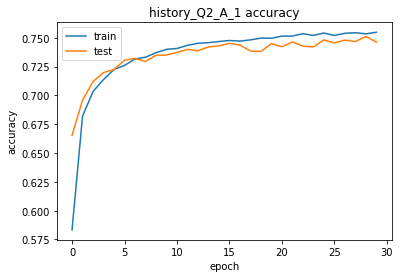

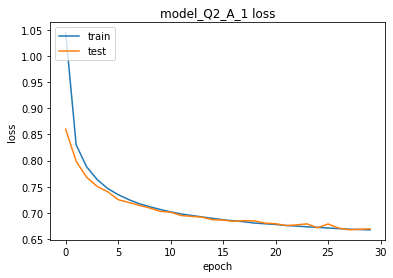

In [10]:
# A.2
print(history_Q2_A_1.history.keys())
# summarize history for accuracy
plt.plot(history_Q2_A_1.history['accuracy'])
plt.plot(history_Q2_A_1.history['val_accuracy'])
plt.title('history_Q2_A_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Q2_A_1.history['loss'])
plt.plot(history_Q2_A_1.history['val_loss'])
plt.title('model_Q2_A_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [11]:
# A.3
loaded_model_Q2_A_3 = keras.models.load_model("model_Q1_B.h5")
loaded_model_Q2_A_3_clone = keras.models.clone_model(loaded_model_Q2_A_3)
loaded_model_Q2_A_3_clone.set_weights(loaded_model_Q2_A_3.get_weights())

model_Q2_A_3 = keras.models.Sequential(loaded_model_Q2_A_3_clone.layers[:-1])
model_Q2_A_3.add(keras.layers.Dense(5, name = 'newsoftmax', activation="softmax"))


for layer in model_Q2_A_3.layers[:-4]:
  layer.trainable = False
  
model_Q2_A_3.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history_Q2_A_3 = model_Q2_A_3.fit(X_train_5_9, y_train_5_9, epochs=30, validation_data=[X_valid_5_9, y_valid_5_9])
score_model_Q2_A_3 = model_Q2_A_3.evaluate(X_test_5_9, y_test_5_9)
print("loss value & metrics values for the model in test mode\n",score_model_Q2_A_3)


Train on 18750 samples, validate on 6250 samples
Epoch 1/30
18750/18750 [==============================] - 3s 150us/sample - loss: 0.5974 - accuracy: 0.7814 - val_loss: 0.4738 - val_accuracy: 0.8315
Epoch 2/30
18750/18750 [==============================] - 3s 142us/sample - loss: 0.4210 - accuracy: 0.8492 - val_loss: 0.4365 - val_accuracy: 0.8376
Epoch 3/30
18750/18750 [==============================] - 3s 137us/sample - loss: 0.3673 - accuracy: 0.8682 - val_loss: 0.4106 - val_accuracy: 0.8483
Epoch 4/30
18750/18750 [==============================] - 2s 133us/sample - loss: 0.3266 - accuracy: 0.8831 - val_loss: 0.4056 - val_accuracy: 0.8534
Epoch 5/30
18750/18750 [==============================] - 2s 129us/sample - loss: 0.2907 - accuracy: 0.8989 - val_loss: 0.4002 - val_accuracy: 0.8554
Epoch 6/30
18750/18750 [==============================] - 2s 125us/sample - loss: 0.2600 - accuracy: 0.9079 - val_loss: 0.4122 - val_accuracy: 0.8554
Epoch 7/30
18750/18750 [===========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


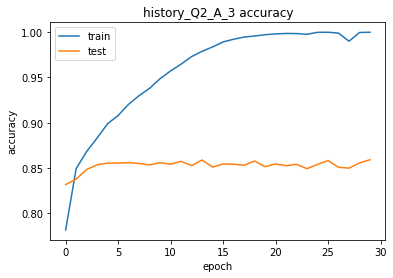

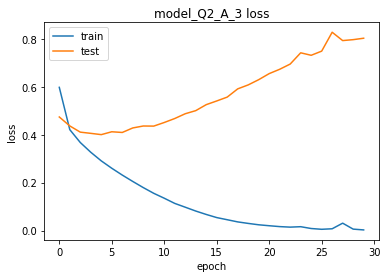

In [12]:
# A.4

print(history_Q2_A_3.history.keys())
# summarize history for accuracy
plt.plot(history_Q2_A_3.history['accuracy'])
plt.plot(history_Q2_A_3.history['val_accuracy'])
plt.title('history_Q2_A_3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Q2_A_3.history['loss'])
plt.plot(history_Q2_A_3.history['val_loss'])
plt.title('model_Q2_A_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# B.1
loaded_model_Q2_B_1 = keras.models.load_model("model_Q1_B.h5")
loaded_model_Q2_B_1_clone = keras.models.clone_model(loaded_model_Q2_B_1)
loaded_model_Q2_B_1_clone.set_weights(loaded_model_Q2_B_1.get_weights())

model_Q2_B_1 = keras.models.Sequential(loaded_model_Q2_B_1_clone.layers[:-3])
model_Q2_B_1.add(keras.layers.Conv2D(200, 3,name="conv_200", activation="relu", padding="same"))
model_Q2_B_1.add(keras.layers.MaxPooling2D(2, name="maxpool_200"))
model_Q2_B_1.add(keras.layers.Flatten())
model_Q2_B_1.add(keras.layers.Dense(128, activation="relu"))
model_Q2_B_1.add(keras.layers.Dense(5, name = 'newsoftmax', activation="softmax"))


for layer in model_Q2_B_1.layers[:-5]:
  layer.trainable = False
  
model_Q2_B_1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history_Q2_B_1 = model_Q2_B_1.fit(X_train_5_9, y_train_5_9, epochs=30, validation_data=[X_valid_5_9, y_valid_5_9])
score_model_Q2_B_1 = model_Q2_B_1.evaluate(X_test_5_9, y_test_5_9)
print("loss value & metrics values for the model in test mode\n",score_model_Q2_B_1)


Train on 18750 samples, validate on 6250 samples
Epoch 1/30
18750/18750 [==============================] - 3s 179us/sample - loss: 0.5769 - accuracy: 0.7863 - val_loss: 0.4381 - val_accuracy: 0.8443
Epoch 2/30
18750/18750 [==============================] - 3s 147us/sample - loss: 0.3675 - accuracy: 0.8666 - val_loss: 0.4234 - val_accuracy: 0.8453
Epoch 3/30
18750/18750 [==============================] - 3s 142us/sample - loss: 0.2739 - accuracy: 0.8996 - val_loss: 0.3775 - val_accuracy: 0.8731
Epoch 4/30
18750/18750 [==============================] - 3s 148us/sample - loss: 0.1953 - accuracy: 0.9302 - val_loss: 0.4361 - val_accuracy: 0.8568
Epoch 5/30
18750/18750 [==============================] - 3s 148us/sample - loss: 0.1325 - accuracy: 0.9547 - val_loss: 0.4327 - val_accuracy: 0.8677
Epoch 6/30
18750/18750 [==============================] - 3s 141us/sample - loss: 0.0868 - accuracy: 0.9701 - val_loss: 0.5023 - val_accuracy: 0.8611
Epoch 7/30
18750/18750 [===========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


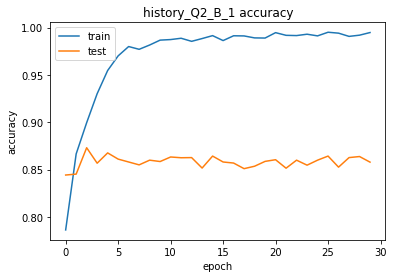

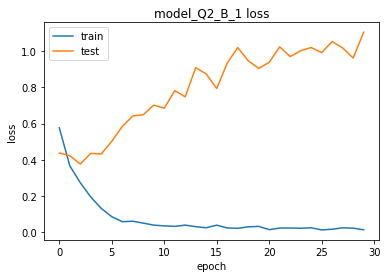

In [14]:
# B.2
print(history_Q2_B_1.history.keys())
# summarize history for accuracy
plt.plot(history_Q2_B_1.history['accuracy'])
plt.plot(history_Q2_B_1.history['val_accuracy'])
plt.title('history_Q2_B_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Q2_B_1.history['loss'])
plt.plot(history_Q2_B_1.history['val_loss'])
plt.title('model_Q2_B_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# C.1
for model in A4

training accuracy is excellent 100% and from loss and accuracy curves we see that there is high variance 
(Overfitting for training data)  


for model in B2

training accuracy is excellent 99.48% and from loss and accuracy curves we see that there is high variance 
(Overfitting for training data)  

Both models are nearly same which means that adding additional convolution layer and maxpooling didn't make any enhancement for 
neural network performance which means it is better to remove these layers to decrease computation cost and also will give fast 
results in traing because removing these layers will remove many wights needed for training